               Close
Date                
1997-05-31  1.588542
1997-06-30  1.537699
1997-07-31  2.205493
1997-08-31  2.231399
1997-09-30  3.492560


/tmp/ipython-input-356118516.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data[['Close']].resample('M').mean()


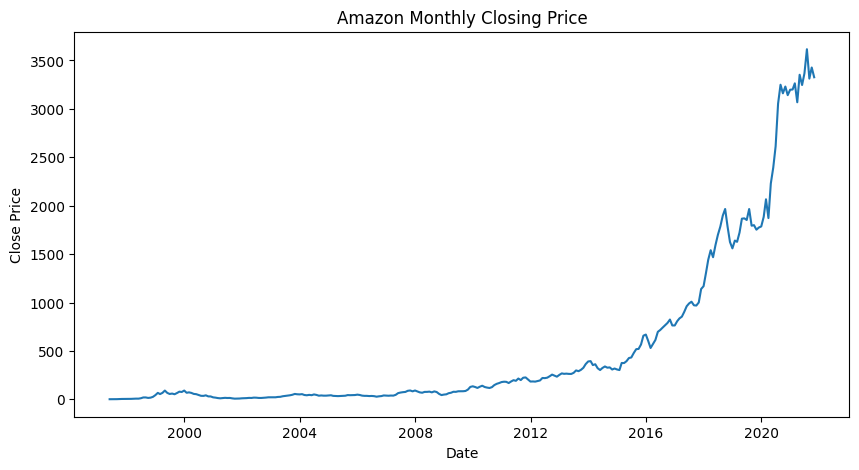

ADF Statistic: 4.000228105503483
p-value: 1.0
Critical Values:
	1%: -3.4541800885158525
	5%: -2.872031361137725
	10%: -2.5723603999791473


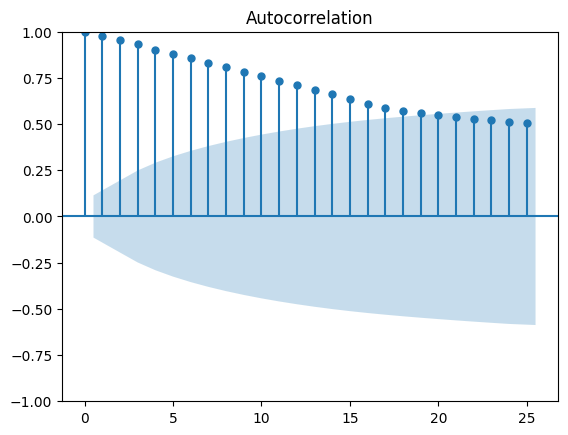

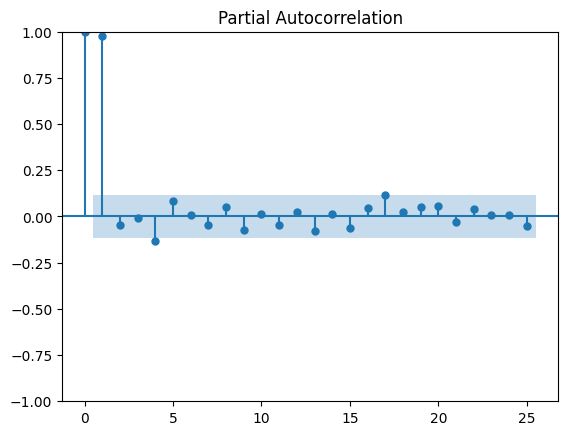

RMSE: 1296.2241015184811


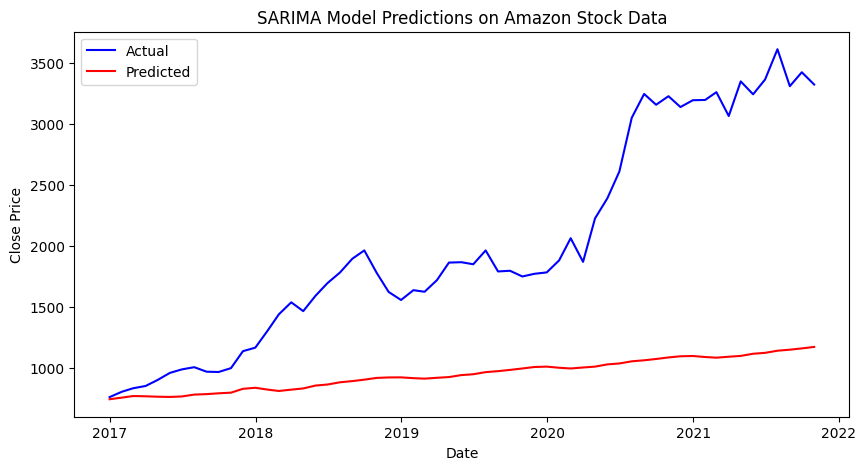


RESULT:
Thus, the SARIMA model was successfully implemented using the Amazon stock dataset.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load Amazon stock dataset
data = pd.read_csv('/content/Amazon.csv')

# Convert 'Date' column to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use 'Close' price for forecasting and resample monthly
data = data[['Close']].resample('M').mean()

# Display first few rows
print(data.head())

# Plot the monthly closing price
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Monthly Closing Price')
plt.show()

# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Check stationarity of Close price
check_stationarity(data['Close'])

# Plot ACF and PACF
plot_acf(data['Close'])
plt.show()

plot_pacf(data['Close'])
plt.show()

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

# Forecast
predictions = sarima_result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# RMSE calculation
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMA Model Predictions on Amazon Stock Data')
plt.legend()
plt.show()

print("\nRESULT:")
print("Thus, the SARIMA model was successfully implemented using the Amazon stock dataset.")